In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np

data=np.load("/content/drive/MyDrive/Datanew.npy")
target=np.load("/content/drive/MyDrive/Targetnew.npy")

In [4]:
data.shape

(13957, 64, 64, 1)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape=data.shape[1:]),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(1024,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(14,activation='softmax')
]
)


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,target,test_size=0.4)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 512)       5120      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 512)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 128)       589952    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)         

In [13]:
X_train.shape

(8374, 64, 64, 1)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('/content/drive/MyDrive/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(X_train,Y_train,epochs=30,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/30
210/210 [==============================] - 521s 2s/step - loss: 2.5972 - accuracy: 0.0993 - val_loss: 2.5592 - val_accuracy: 0.1015
INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-001.model/assets
Epoch 2/30
210/210 [==============================] - 521s 2s/step - loss: 2.4580 - accuracy: 0.1499 - val_loss: 2.2601 - val_accuracy: 0.2227
INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-002.model/assets
Epoch 3/30
210/210 [==============================] - 519s 2s/step - loss: 2.2124 - accuracy: 0.2454 - val_loss: 2.0322 - val_accuracy: 0.3009
INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-003.model/assets
Epoch 4/30
210/210 [==============================] - 517s 2s/step - loss: 2.0029 - accuracy: 0.3245 - val_loss: 1.9869 - val_accuracy: 0.3361
INFO:tensorflow:Assets written to: /content/drive/MyDrive/model-004.model/assets
Epoch 5/30
210/210 [==============================] - 516s 2s/step - loss: 1.8476 - accuracy: 0.3861 - v

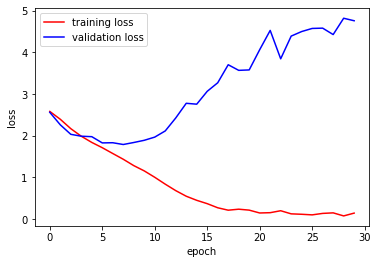

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

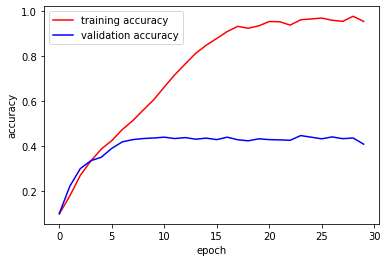

In [16]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [17]:
print(model.evaluate(X_test,Y_test))

175/175 [==============================] - 108s 616ms/step - loss: 4.5956 - accuracy: 0.4301
[4.595606803894043, 0.43005552887916565]
